看lifespan的分布状况

In [58]:
import pandas as pd
import numpy as np
import sqlite3
import tqdm
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db_file=r'C:\sqlite3\chess.db'
conn=sqlite3.connect(db_file)
cursor=conn.cursor()
df=pd.read_sql(f"SELECT * FROM lifespan",conn)

In [3]:
lifespan_df=df
pieces_list= [
    #"king_1LifeRatio", always 1
    "queen_1LifeRatio", 
    "rook_1LifeRatio", "rook_2LifeRatio", 
    "bishop_1LifeRatio", "bishop_2LifeRatio", 
    "knight_1LifeRatio", "knight_2LifeRatio", 
    "pawn_1LifeRatio", "pawn_2LifeRatio", "pawn_3LifeRatio", "pawn_4LifeRatio", "pawn_5LifeRatio", "pawn_6LifeRatio", "pawn_7LifeRatio", "pawn_8LifeRatio", 
    #可能会出现null值
    "queen_promo_1LifeRatio", "queen_promo_2LifeRatio", "queen_promo_3LifeRatio", "queen_promo_4LifeRatio", "queen_promo_5LifeRatio", 
    "queen_promo_6LifeRatio", "queen_promo_7LifeRatio", "queen_promo_8LifeRatio", 
    "rook_promo_1LifeRatio", "rook_promo_2LifeRatio", "rook_promo_3LifeRatio", "rook_promo_4LifeRatio", "rook_promo_5LifeRatio", 
    "rook_promo_6LifeRatio", "rook_promo_7LifeRatio", "rook_promo_8LifeRatio", 
    "bishop_promo_1LifeRatio", "bishop_promo_2LifeRatio", "bishop_promo_3LifeRatio", "bishop_promo_4LifeRatio", "bishop_promo_5LifeRatio",
    "bishop_promo_6LifeRatio", "bishop_promo_7LifeRatio", "bishop_promo_8LifeRatio", 
    "knight_promo_1LifeRatio", "knight_promo_2LifeRatio", "knight_promo_3LifeRatio", "knight_promo_4LifeRatio", "knight_promo_5LifeRatio", 
    "knight_promo_6LifeRatio", "knight_promo_7LifeRatio", "knight_promo_8LifeRatio"
]

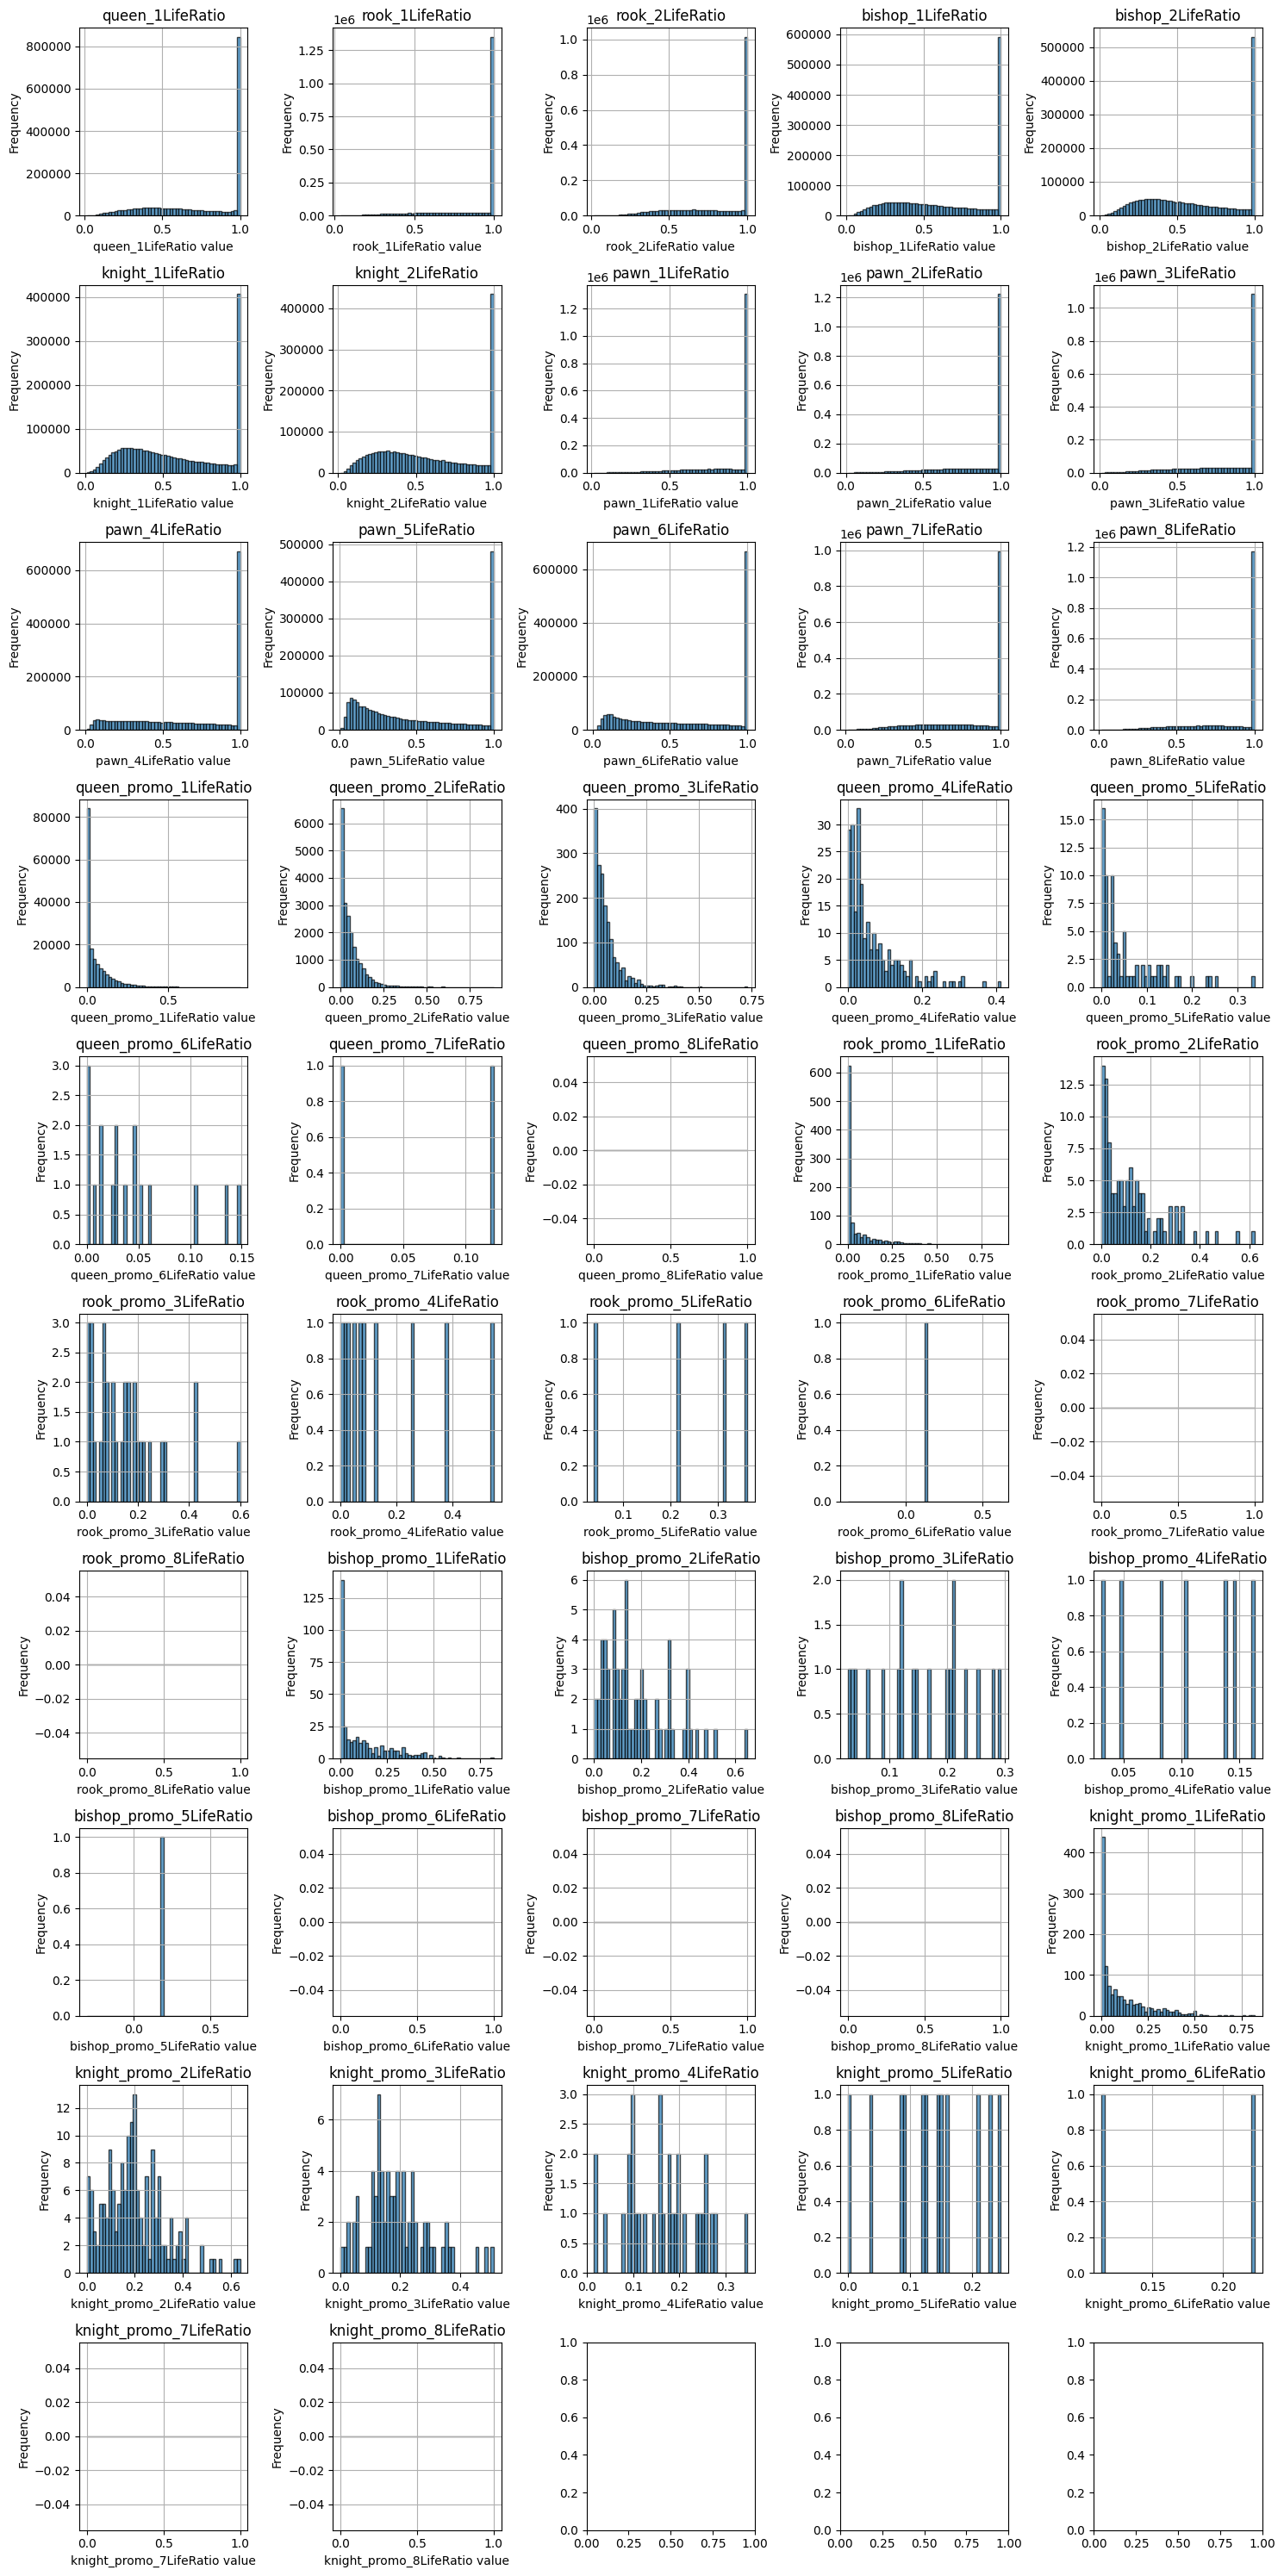

In [ ]:
cols_per_row =5
n_plots = len(pieces_list)

rows = np.ceil(n_plots / cols_per_row).astype(int)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 3* rows))
axes = axes.flatten()  

for i, selected_column in enumerate(pieces_list):
    if selected_column in df.columns:  
        df_cleaned = df[[selected_column]].dropna()

        df_cleaned[selected_column] = pd.to_numeric(df_cleaned[selected_column], errors='coerce')

        df_cleaned = df_cleaned.dropna()

        axes[i].hist(df_cleaned[selected_column], bins=50, edgecolor='black', alpha=0.7)
        axes[i].set_title(f"{selected_column}")
        axes[i].set_xlabel(f"{selected_column} value")
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True)
    else:
        print(f"列{selected_column}不在数据中")

plt.tight_layout()
plt.show()

to players

In [ ]:
for col in pieces_list:
    if col in lifespan_df.columns:
        lifespan_df[col]=pd.to_numeric(lifespan_df[col], errors="coerce")
player_pieces_means=(
    lifespan_df.groupby('player')[pieces_list].mean()
)
player_pieces_means.to_sql(name='player_piece_life',con=conn,if_exists='replace',index=True)

8816

列queen_promo_8LifeRatio全为空值，跳过画图
列rook_promo_7LifeRatio全为空值，跳过画图
列rook_promo_8LifeRatio全为空值，跳过画图
列bishop_promo_6LifeRatio全为空值，跳过画图
列bishop_promo_7LifeRatio全为空值，跳过画图
列bishop_promo_8LifeRatio全为空值，跳过画图
列knight_promo_7LifeRatio全为空值，跳过画图
列knight_promo_8LifeRatio全为空值，跳过画图


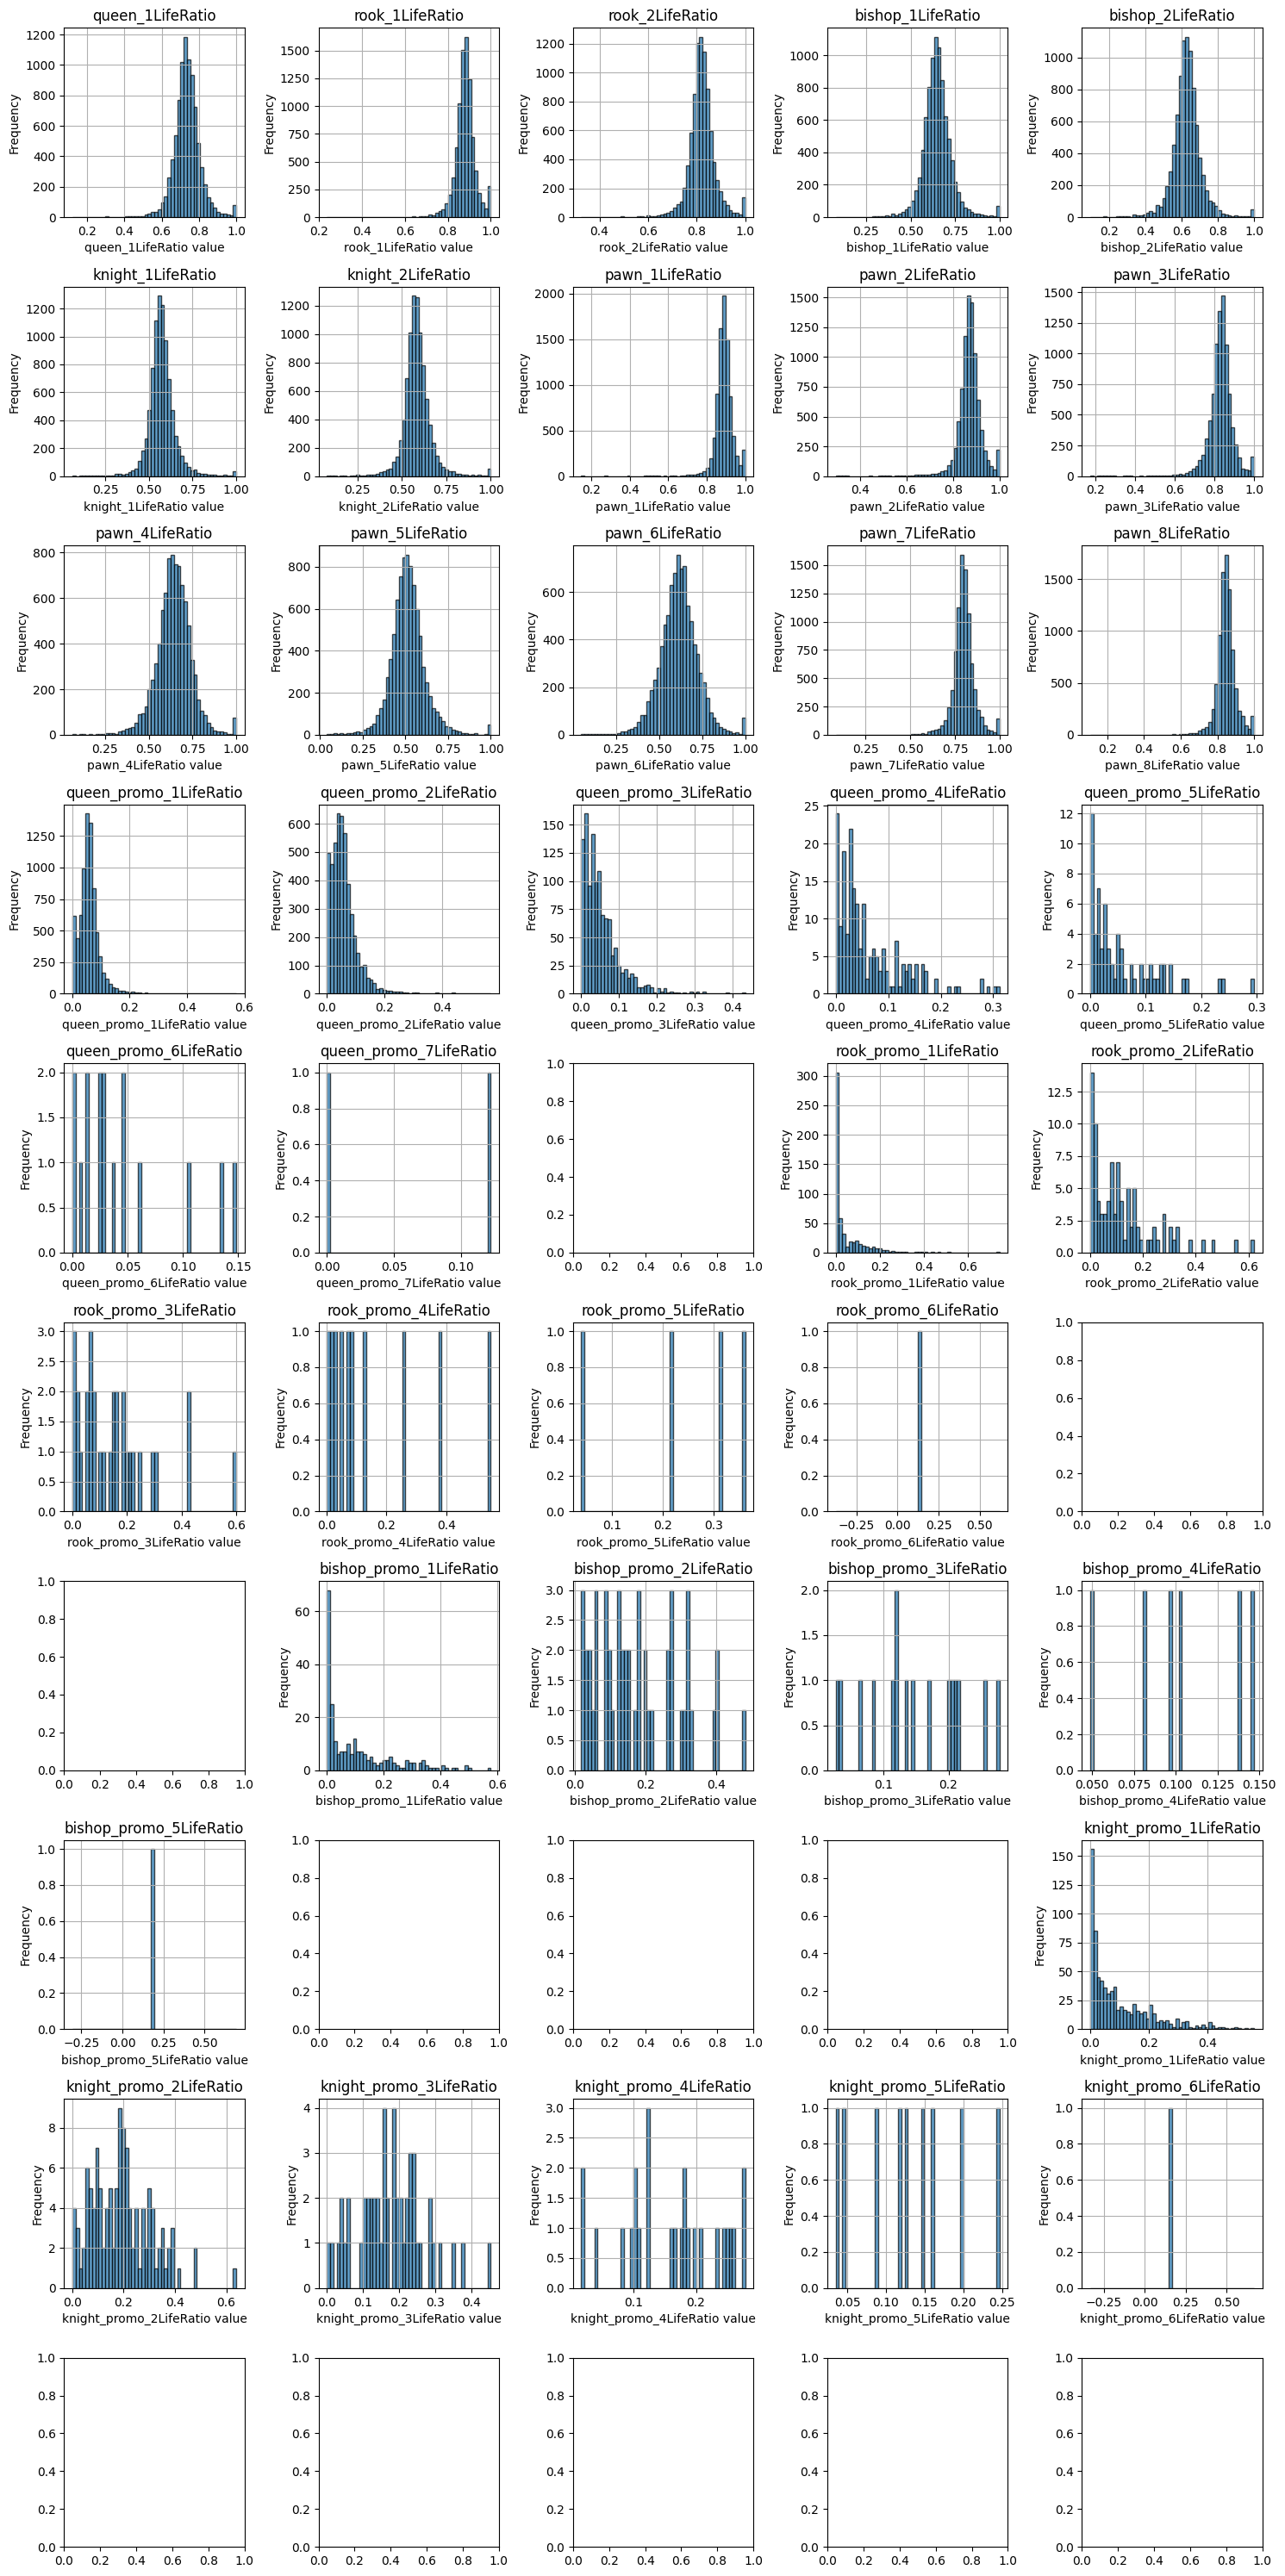

In [ ]:
#选手分布饼图
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 3* rows))
axes = axes.flatten()  
for i, selected_column in enumerate(pieces_list):
    player_pieces_data=player_pieces_means[selected_column].dropna()
    if selected_column in df.columns:  
        if len(player_pieces_data)>0:
            axes[i].hist(player_pieces_means[selected_column], bins=50, edgecolor='black', alpha=0.7)
            axes[i].set_title(f"{selected_column}")
            axes[i].set_xlabel(f"{selected_column} value")
            axes[i].set_ylabel("Frequency")
            axes[i].grid(True)
        else:
            print(f"列{selected_column}全为空值，跳过画图")
    else:
        print(f"列{selected_column}不在数据中")

plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36788\1606874905.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


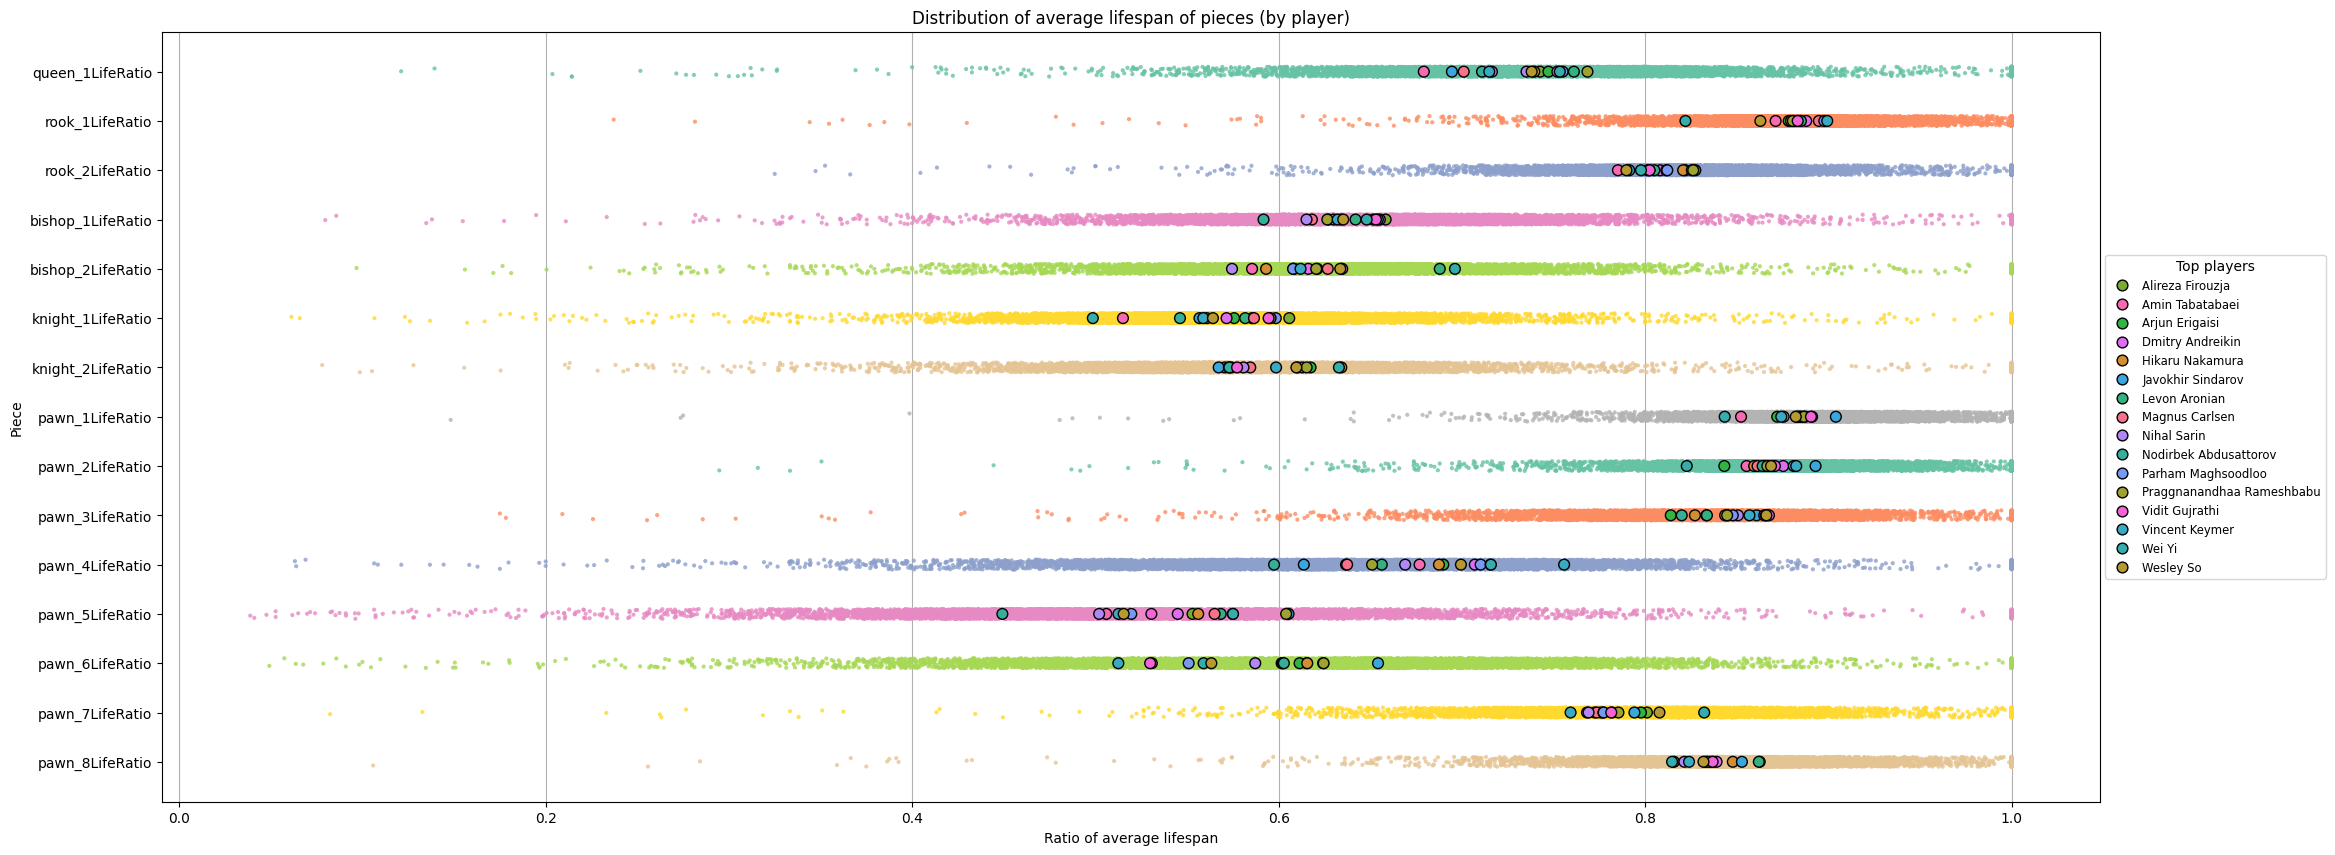

图像已保存到: lifespan_main_pieces.png


C:\Users\Administrator\AppData\Local\Temp\ipykernel_36788\1606874905.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


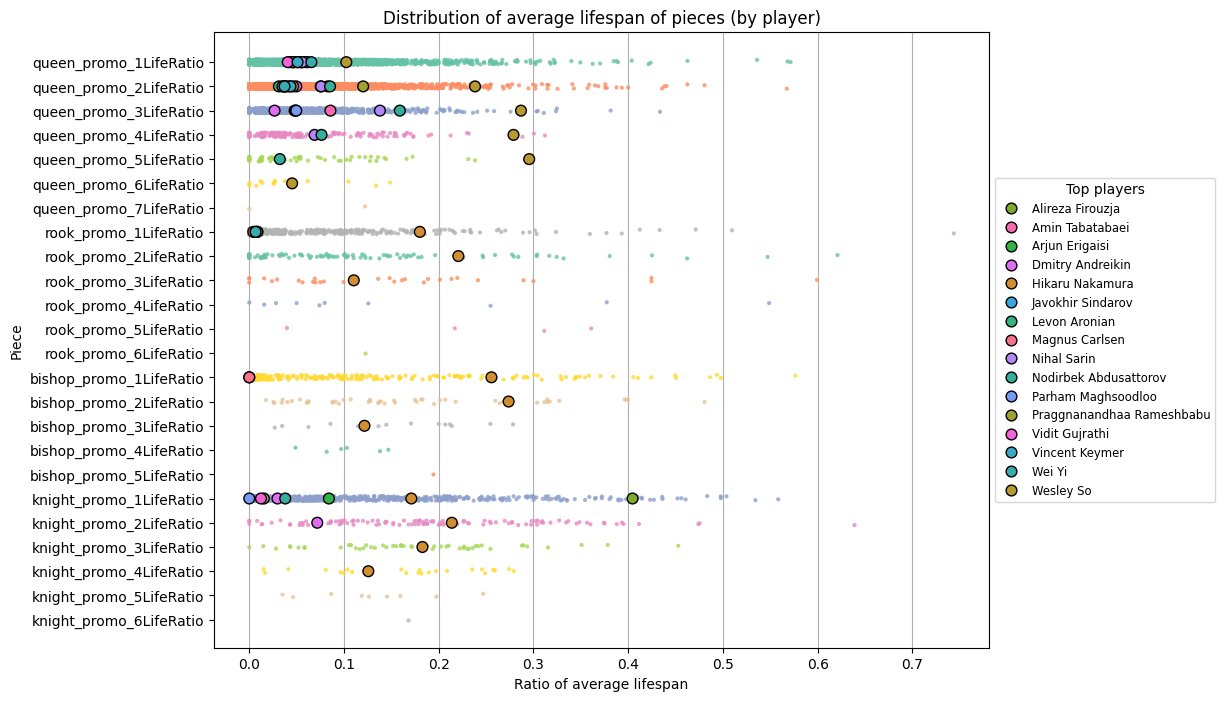

图像已保存到: lifespan_promoted_pieces.png


In [105]:
def plot_lifespan_distribution(player_pieces_means, pieces_list, top_names=None,
                               save_path="lifespan_distribution.png",
                               figsize=None, dpi=300):

    df_main_pieces = player_pieces_means.reset_index().melt(
        id_vars="player",
        value_vars=pieces_list,
        var_name="piece",
        value_name="life_ratio"
    ).dropna()

    # 高亮数据
    if top_names:
        df_highlight = df_main_pieces[df_main_pieces['player'].isin(top_names)]
        highlight_colors = sns.color_palette("husl", len(top_names))
        color_map = dict(zip(top_names, highlight_colors))
    else:
        df_highlight = None
        color_map = None

    plt.figure(figsize=figsize)
    sns.stripplot(
        data=df_main_pieces,
        x="life_ratio",
        y="piece",
        jitter=True,
        size=3,
        palette="Set2",
        alpha=0.8
    )
    if df_highlight is not None and not df_highlight.empty:
        sns.scatterplot(
            data=df_highlight,
            x="life_ratio",
            y="piece",
            hue="player",
            palette=color_map,
            s=60,
            edgecolor="black",
            linewidth=1,
            alpha=1,
            marker='o',
            legend="brief",
            zorder=3
        )
        plt.legend(
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            title="Top players",
            fontsize="small"
        )

    plt.title("Distribution of average lifespan of pieces (by player)")
    plt.xlabel("Ratio of average lifespan")
    plt.ylabel("Piece")
    plt.grid(True, axis="x")

    plt.savefig(save_path, dpi=dpi, bbox_inches="tight")
    plt.show()
    print(f"图像已保存到: {save_path}")

plot_lifespan_distribution(
    player_pieces_means,
    pieces_list[:15],
    top_names=top_names,
    figsize=(25,10),
    save_path="lifespan_main_pieces.png"
)
plot_lifespan_distribution(
    player_pieces_means,
    pieces_list[15:],
    top_names=top_names,
    figsize=(10,8),
    save_path="lifespan_promoted_pieces.png"
)